# Module 1 Project
## Ben Geissel & Andrew Cole
### The Movie Database - Insights

In [4]:
# Import libraries with proper aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import tmdb_clean
import bom_clean
import imdb_clean

In [5]:
# Utilize Clean function from tmdb_clean.py file
tmdb_budgets_df = tmdb_clean.clean('tn.movie_budgets.csv')

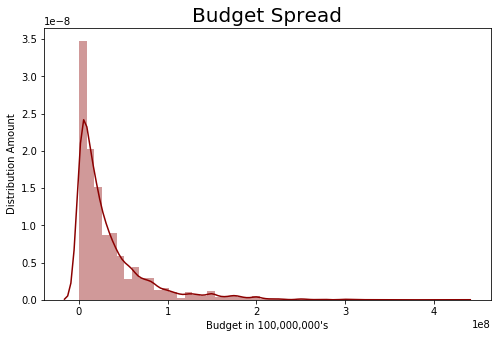

In [6]:
# Check distribution of budgets in order to make proper bins
fig = plt.figure(figsize = (8,5))
sns.distplot(tmdb_budgets_df.production_budget, bins = 50, color = 'darkred', kde = True);
plt.xlabel("Budget in 100,000,000's")
plt.ylabel('Distribution Amount')
plt.title('Budget Spread', fontsize = 20)
plt.show()
#Many smaller budgets than large budgets

In [7]:
# Create columns for Return on Investment for both Domestic and Worldwide
tmdb_budgets_df['Gross_ROI'] = ((tmdb_budgets_df.domestic_gross - tmdb_budgets_df.production_budget) / 
                                tmdb_budgets_df.production_budget)
tmdb_budgets_df['Worldwide_ROI'] = ((tmdb_budgets_df.worldwide_gross - tmdb_budgets_df.production_budget) / 
                                    tmdb_budgets_df.production_budget)

In [8]:
# Create Pivot Tables for both Domestic and Worldwide ROI
tmdb_budgets_domestic_pivot_df = pd.pivot_table(tmdb_budgets_df, index = 'movie_date',
                                              columns = 'binned_budget',
                                              values = 'Gross_ROI',
                                               aggfunc = 'sum')

tmdb_budgets_worldwide_pivot_df = pd.pivot_table(tmdb_budgets_df, index = 'movie_date',
                                              columns = 'binned_budget',
                                              values = 'Worldwide_ROI',
                                               aggfunc = 'sum')

In [9]:
# Create a Series of the mean ROI by binned budget for both domestic and worldwide
domestic_roi_by_budget = tmdb_budgets_domestic_pivot_df.mean()

worldwide_roi_by_budget = tmdb_budgets_worldwide_pivot_df.mean()

In [10]:
# Create bins labels for plotting
bins_labels = ['($0, $500K]', '($500K, $1M]', '($1M, $5M]',
               '($5M, $10M]', '($10M, $25M]', '($25M, $50M]',
               '($50M, $100M]', '($100M, $500M]']

In [11]:
# Create an equivalent dictionary to the series generated above. Zip together with labels. These will be used for plotting.
worldwide_roi_dict = {}
for label in tmdb_budgets_worldwide_pivot_df.columns:
    worldwide_roi_dict[str(label)] = worldwide_roi_by_budget[label]
worldwide_roi_dict = dict(zip(bins_labels, list(worldwide_roi_dict.values())))

domestic_roi_dict = {}
for label in tmdb_budgets_domestic_pivot_df.columns:
    domestic_roi_dict[str(label)] = domestic_roi_by_budget[label]
domestic_roi_dict = dict(zip(bins_labels, list(domestic_roi_dict.values())))

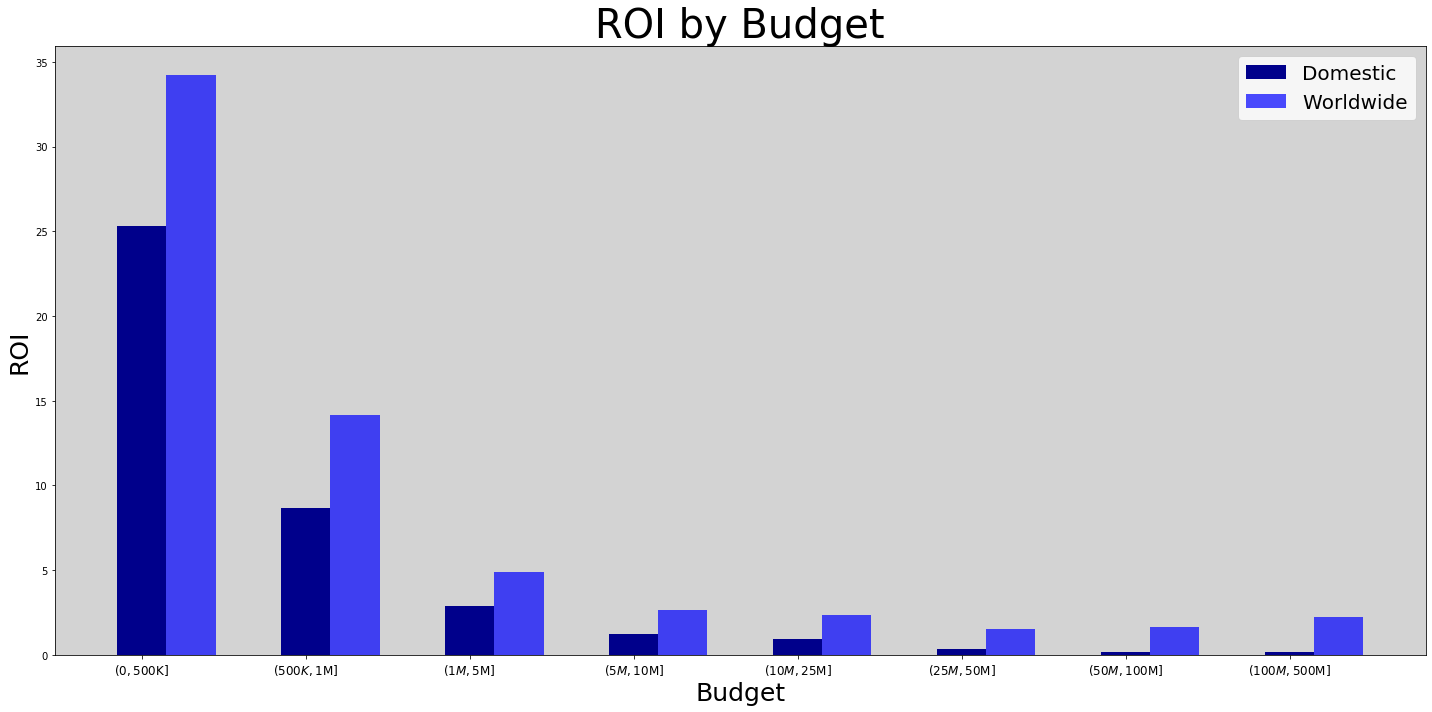

In [13]:
# Create a barplot to show domestic and worldwide ROI compared to Budget Bin
fig = plt.figure(figsize=(20, 10))
X = np.arange(len(domestic_roi_dict))
ax = plt.subplot(111)
ax.set_facecolor('lightgray')
ax.bar(X, domestic_roi_dict.values(), width=0.3, color='darkblue')
ax.bar(X+0.3, worldwide_roi_dict.values(), width=0.3, color='blue', alpha = .7)
ax.legend(('Domestic','Worldwide'), fontsize = 20)
plt.xticks(X, domestic_roi_dict.keys(), fontsize = 12)
plt.title("ROI by Budget", fontsize=40)
plt.ylabel('ROI', fontsize = 25)
plt.xlabel('Budget', fontsize = 25)
plt.tight_layout()
plt.show()

### Box Office Mojo - Insights

In [15]:
# Utilize Clean function from bom_clean.py file
bom_df = bom_clean.clean('bom.movie_gross.csv')

In [16]:
# Group bom_df by studio to see the mean domestic gross value by studio
bom_studio_grouped_df = bom_df.groupby(by = 'studio', axis = 0).mean()

In [17]:
# Sort values of the grouped dataframe and take the first 10 values for plotting
bom_studio_grouped_topten_df = bom_studio_grouped_df.sort_values('domestic_gross',
                                                                 ascending = False)[:10]['domestic_gross']

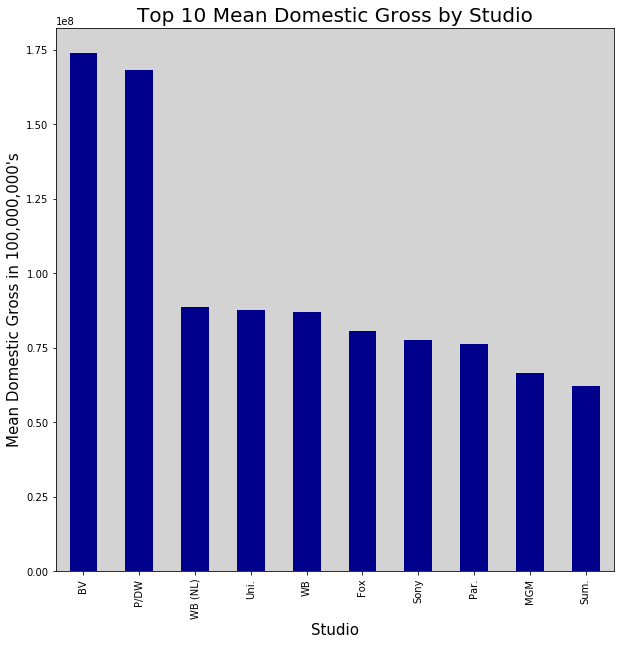

In [19]:
# Plot top 10 studios for mean domestic gross in a barplot
fig = plt.figure(figsize = (10,10), facecolor = 'w')
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('lightgray')
bom_studio_grouped_topten_df.plot(kind = 'bar', color = 'darkblue');
plt.xlabel('Studio', fontsize = 15)
plt.ylabel("Mean Domestic Gross in 100,000,000's", fontsize = 15)
plt.title('Top 10 Mean Domestic Gross by Studio', fontsize = 20)
plt.show()

### IMDB - Insights

In [13]:
#Utilize merge & clean IMDB function from imdb_clean.py file
imdb_clean_new = imdb_clean.merge_clean_imdb_files()

In [14]:
#Determine appropriate movie count minimum for inolved persons 
imdb_names_count = imdb_clean_new.primary_name.value_counts()
imdb_prominent_names = imdb_names_count.loc[imdb_names_count > 9]

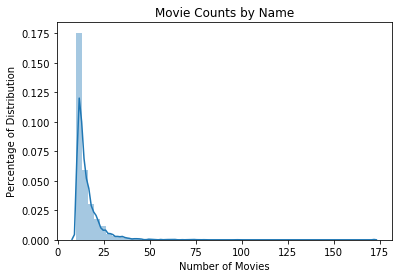

In [15]:
#Graph movie count qualifiers for data assumptions
fig = plt.figure()
imdb_graph = sns.distplot(imdb_prominent_names)
plt.title('Movie Counts by Name')
plt.ylabel('Percentage of Distribution')
plt.xlabel('Number of Movies')
plt.show()

In [16]:
#Create unique DataFrame of highest rated overall persons
name, count = np.unique(imdb_clean_new.primary_name, return_counts=True)

more_than_9 = []

for name, count in zip(name, count):
    if count > 9:
        more_than_9.append(name)
        
top_name_ratings = imdb_clean_new[imdb_clean_new.primary_name.isin(more_than_9)].sort_values('averagerating', ascending = False).iloc[0:10]
top_name_ratings.drop('primary_profession', axis = 1, inplace = True)
top_name_ratings.style.set_properties(**{'text_align': 'center'})
top_name_ratings.rename(columns = {'averagerating':'Average Rating', 'category': 'Category', 'primary_name':'Primary Name'}, inplace = True)
top_name_ratings



,Average Rating,Category,Primary Name
49669,10.0,composer,Grégoire Hetzel
35361,10.0,editor,Nadia Ben Rachid
149867,9.9,self,Sergey A.
131236,9.8,self,Maria Olsen
46613,9.7,actor,Eric Roberts
9002,9.7,actor,Leonardo DiCaprio
161585,9.7,actor,Kevin Sizemore
74091,9.7,actress,Margot Robbie
33044,9.7,producer,David Heyman
687,9.7,actor,Brad Pitt


In [17]:
#Check for duplicates
top_name_ratings[top_name_ratings.duplicated(keep = False)].sort_values('Primary Name')

,Average Rating,Category,Primary Name


In [18]:
#Group top rated persons by category
top_category_ratings = top_name_ratings.groupby(['Category']).max()
top_category_ratings.style.set_properties(**{'text_align':'center'})


,Average Rating,Primary Name
Category,,
actor,9.7,Leonardo DiCaprio
actress,9.7,Margot Robbie
composer,10,Grégoire Hetzel
editor,10,Nadia Ben Rachid
producer,9.7,David Heyman
self,9.9,Sergey A.
